# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 
**Below two-point methos is refered as 'deriv2', sorry.**

In [3]:
import numpy as np
def deriv2(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    x1 = x + h
    dx = x1 - x
    df = f(x1) - f(x)
    return df/dx

In [4]:
def deriv3(f, x, h):
    x1 = x + h 
    x2 = x1 + h
    dx_1 = x1 - x #here we agree steps
    dx_2 = x2 - x
    up = -3*f(x)+4*f(x+h)-f(x+h+h)
    #print(h, 4*dx_1 - dx_2, dx_1, dx_2)
    return up/(4*dx_1 - dx_2)
deriv3 = np.vectorize(deriv3)
deriv2 = np.vectorize(deriv2)

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [5]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5, 1e-7,1e-14, 1e-20]:
    err = deriv3(lambda x: x**3, x, h)
    print("%2.g -- %7.4g" % (h, err))

0.01 -- -0.0002
0.001 --  -2e-06
0.0001 --  -2e-08
1e-05 --  -2e-10
1e-07 --  -2e-14
1e-14 --  -2e-28
1e-20 --  -2e-40


Hmm, all is good?)

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [6]:
from math import log
import numpy as np
def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

Summary error for one point:
$$
    e \sim f'' h + \frac{e_f}{h}\cdot(\sim h)
$$
Corollary $h_{opt}$ is supposed to be approched when 'mashine eps' is got. Moreover $err$ is decrising with $h$.
What about two-point, we are expect same point, but we have to agree 'real steps'.
Thus 
$$
h_{opt}^{(1)}\sim 10^{-16}\;
h_{opt}^{(2)}\sim 10^{-8}
$$
**Notice!** That is due to $f(x+h) \sim h $

In [7]:
h = np.logspace(-15, -2, 17)
err3 = abs(fder(1) - deriv3(f, 1 , h))
err2 = abs(fder(1) - deriv2(f,1 , h))

<IPython.core.display.Javascript object>


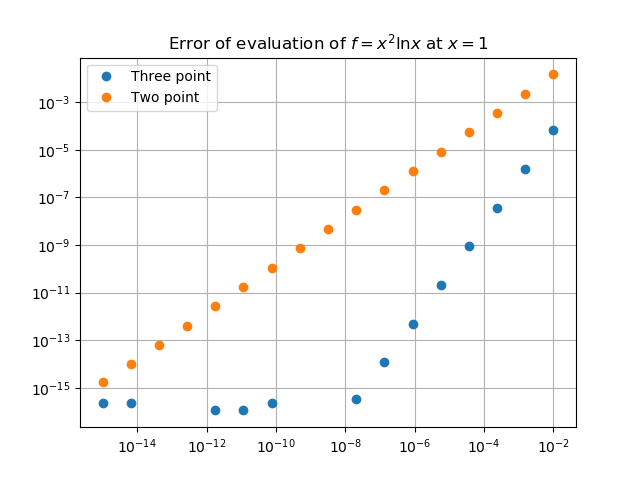

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot(h, err3, 'o', label='Three point')
plt.plot(h, err2, 'o',label='Two point')
plt.grid()
plt.title(r'Error of evaluation of $f =x^2\ln x$ at $x=1$')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [10]:
def f(x):
    if x < 1e-50:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv3(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))
    

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


In [11]:
h = np.logspace(-48, -2, 20
               )
err3 = abs(fder(x) - deriv3(f, x , h))
err2 =abs(fder(x) - deriv2(f, x , h))

<IPython.core.display.Javascript object>


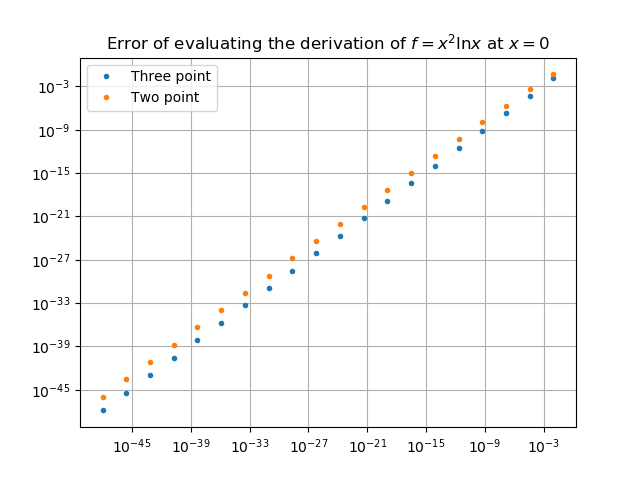

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot(h, err3, '.', label='Three point')
plt.plot(h, err2, '.',label='Two point')
plt.grid()
plt.title(r'Error of evaluating the derivation of $f =x^2\ln x$ at $x=0$')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

We see strange result, but it is easy to explain, first get derivations:
$$
f^{(0)}(0) = x^2 \ln x\;
f^{(1)}(0) = 2x \ln x + x;
f^{(2)}(0) = 2 \ln x + 3= \infty;
$$
Thus there is not Teylor series.
End $\boxed{err\sim h\ln h}$ in two-poind case.
What about 3-point, $$err\sim \frac{h^2\ln h  - h^2 \ln(2h)}{h}\boxed{\sim h}$$
And at the plot we can see this different

<IPython.core.display.Javascript object>


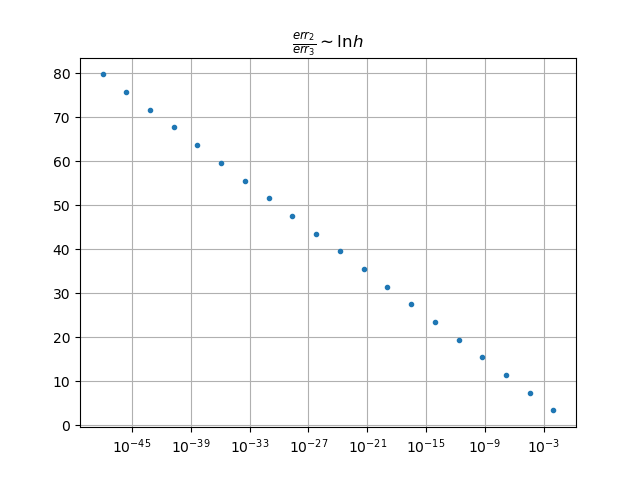

Text(0.5, 1.0, '$\\frac{err_{2}}{err_{3}}\\sim \\ln h$')

In [13]:
plt.figure()
plt.plot(h, err2/err3,'.')
plt.grid()
plt.xscale('log')
plt.title(r'$\frac{err_{2}}{err_{3}}\sim \ln h$')

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [ ]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    

In [ ]:
plt.figure()
plt.plot(n, err)
pl.grid()
plt.xscale('log')
plt.yscale('log')

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


... ENTER YOUR CODE AND COMMENTS HERE ...

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...